# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import plotly.express as px

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости расчетов")

Для воспроизводимости расчетов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
target = 'selling_price'

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [10]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [11]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [13]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
columns = [col for col in df_train.columns if col not in 'selling_price']

In [15]:
df_train[df_train.duplicated(keep=False, subset=columns)].shape[0]

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [16]:
df_train[df_train.duplicated(keep=False, subset=columns)].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [17]:
df_train = df_train.drop_duplicates(subset=columns, keep='first')

In [18]:
df_train.shape

(5840, 13)

In [19]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [20]:
df_train.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)

In [21]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [22]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [23]:
df_train['mileage'].str.split(expand=True)[1].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [24]:
df_train['engine'].str.split(expand=True)[1].unique()

array(['CC', nan], dtype=object)

In [25]:
df_train['max_power'].str.split(expand=True)[1].unique()

array(['bhp', nan, None], dtype=object)

In [26]:
(df_train['max_power'] == ' bhp').sum()

1

In [27]:
for col in ['mileage', 'engine', 'max_power']:
    
    if col == 'max_power':
        df_train.loc[df_train['max_power'] == ' bhp', 'max_power'] = None
        df_test.loc[df_test['max_power'] == ' bhp', 'max_power'] = None
        
    df_train[col] = df_train[col].str.split(expand=True)[0].astype(float)
    df_test[col] = df_test[col].str.split(expand=True)[0].astype(float)
    

In [28]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

In [29]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [30]:
# старые дф до обработки пропусков, пригодятся нам ниже
df_train_old = df_train.copy()
df_test_old = df_test.copy()

In [31]:
# поля получены из анализа выше на пропуски
from sklearn.impute import SimpleImputer

mileage_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_train[['mileage', 'max_power', 'seats', 'engine']] =\
            mileage_imputer.fit_transform(df_train[['mileage', 'max_power', 'seats', 'engine']])
df_test[['mileage', 'max_power', 'seats', 'engine']] =\
            mileage_imputer.transform(df_test[['mileage', 'max_power', 'seats', 'engine']])

In [32]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


In [33]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

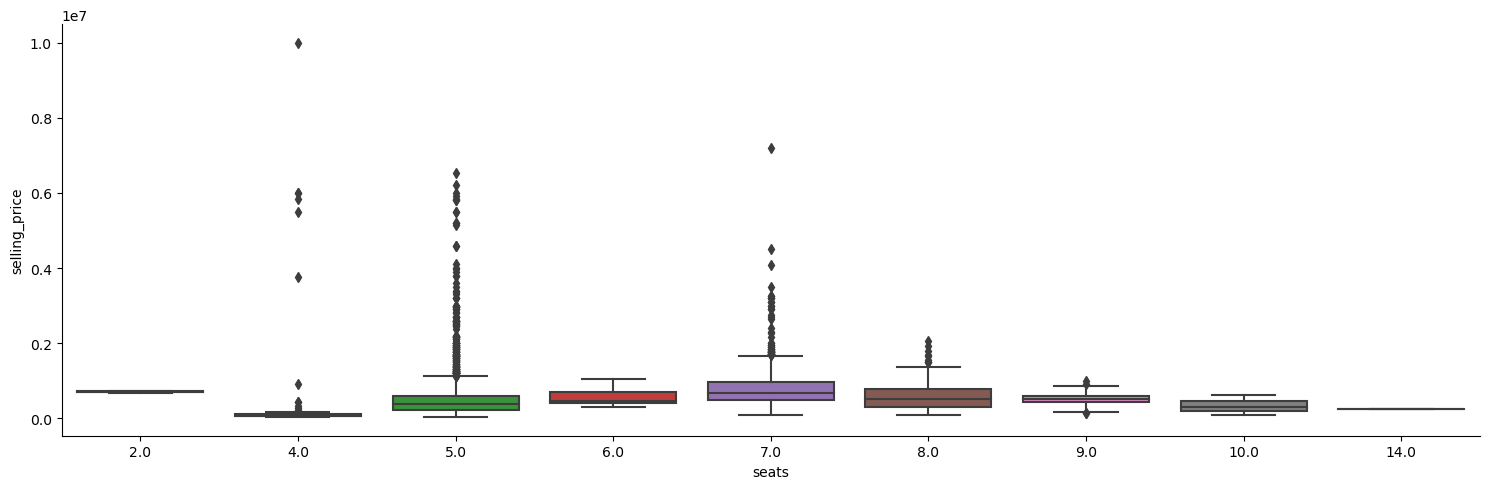

In [34]:
var = 'seats'
sns.catplot(y=target, x=var, data= df_train.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

In [35]:
print("Зависимость таргета от seats немонотонная. Возможно, если сделать поле категориальным, то результат будет лучше")

Зависимость таргета от seats немонотонная. Возможно, если сделать поле категориальным, то результат будет лучше


In [36]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

<Figure size 600x600 with 0 Axes>

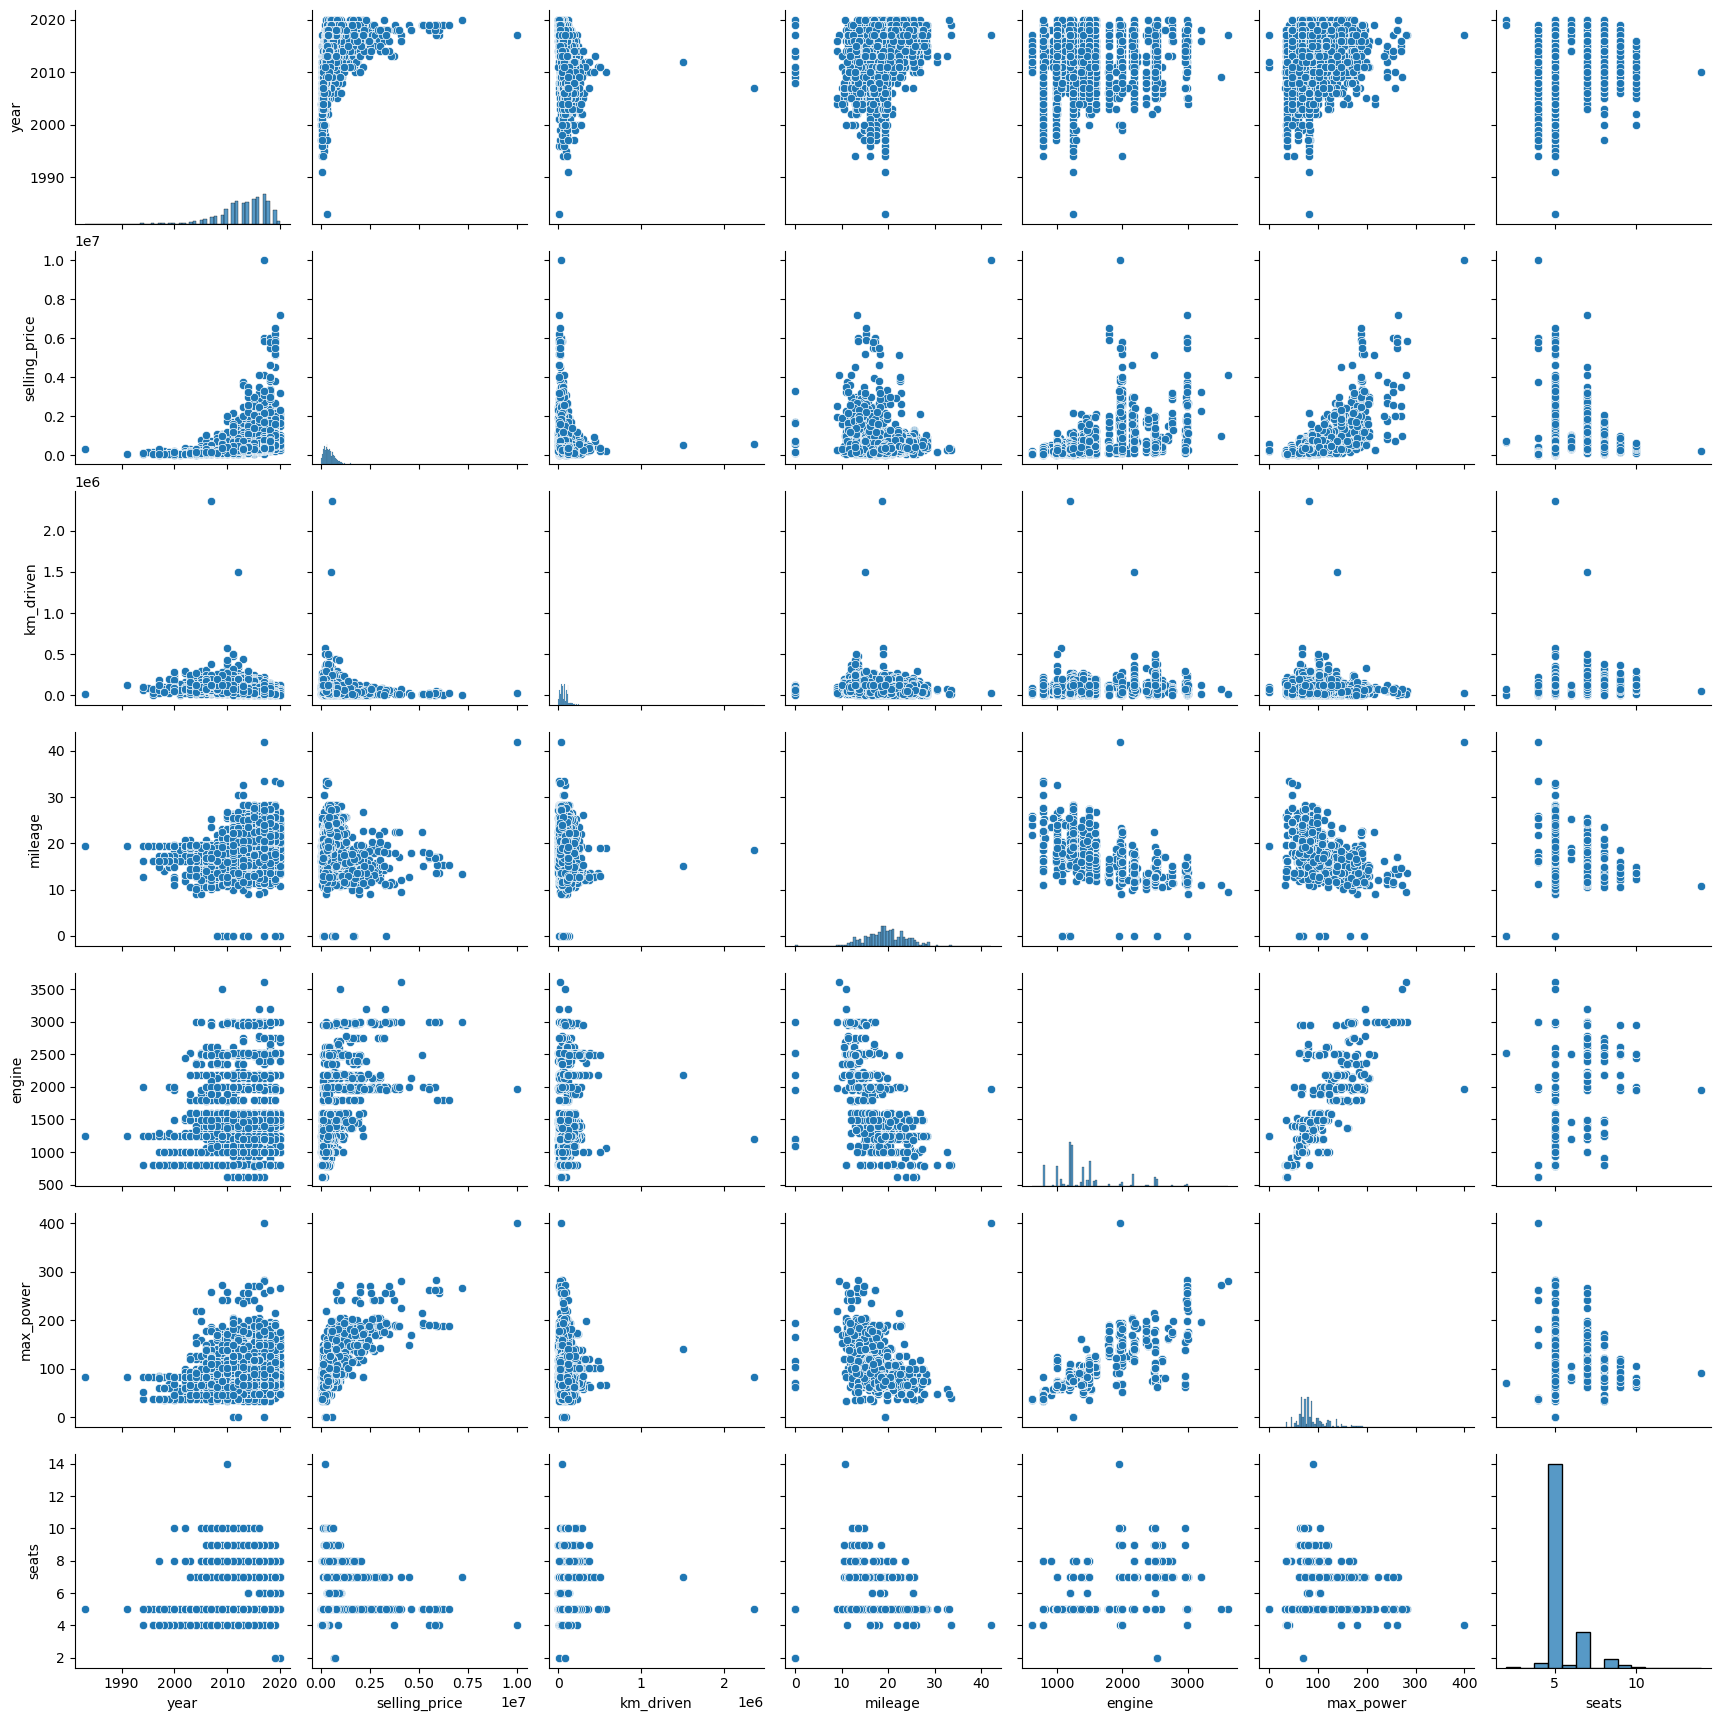

In [37]:
plt.figure(figsize=(6,6))
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Связь предикторов с целевой

Наиболее сильная связь наблюдается между целевой и предикторами (max_power, max_driven, year). При этом связь нелинейная (например, между целевой и предиктором year).
Чем новее автомобиль, тем выше его цена.

2. Корреляция признаков

Есть высокая положительная корреляция между max_power и engine.
Есть отрицательная корреляция между engine и mileage.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

<Figure size 600x600 with 0 Axes>

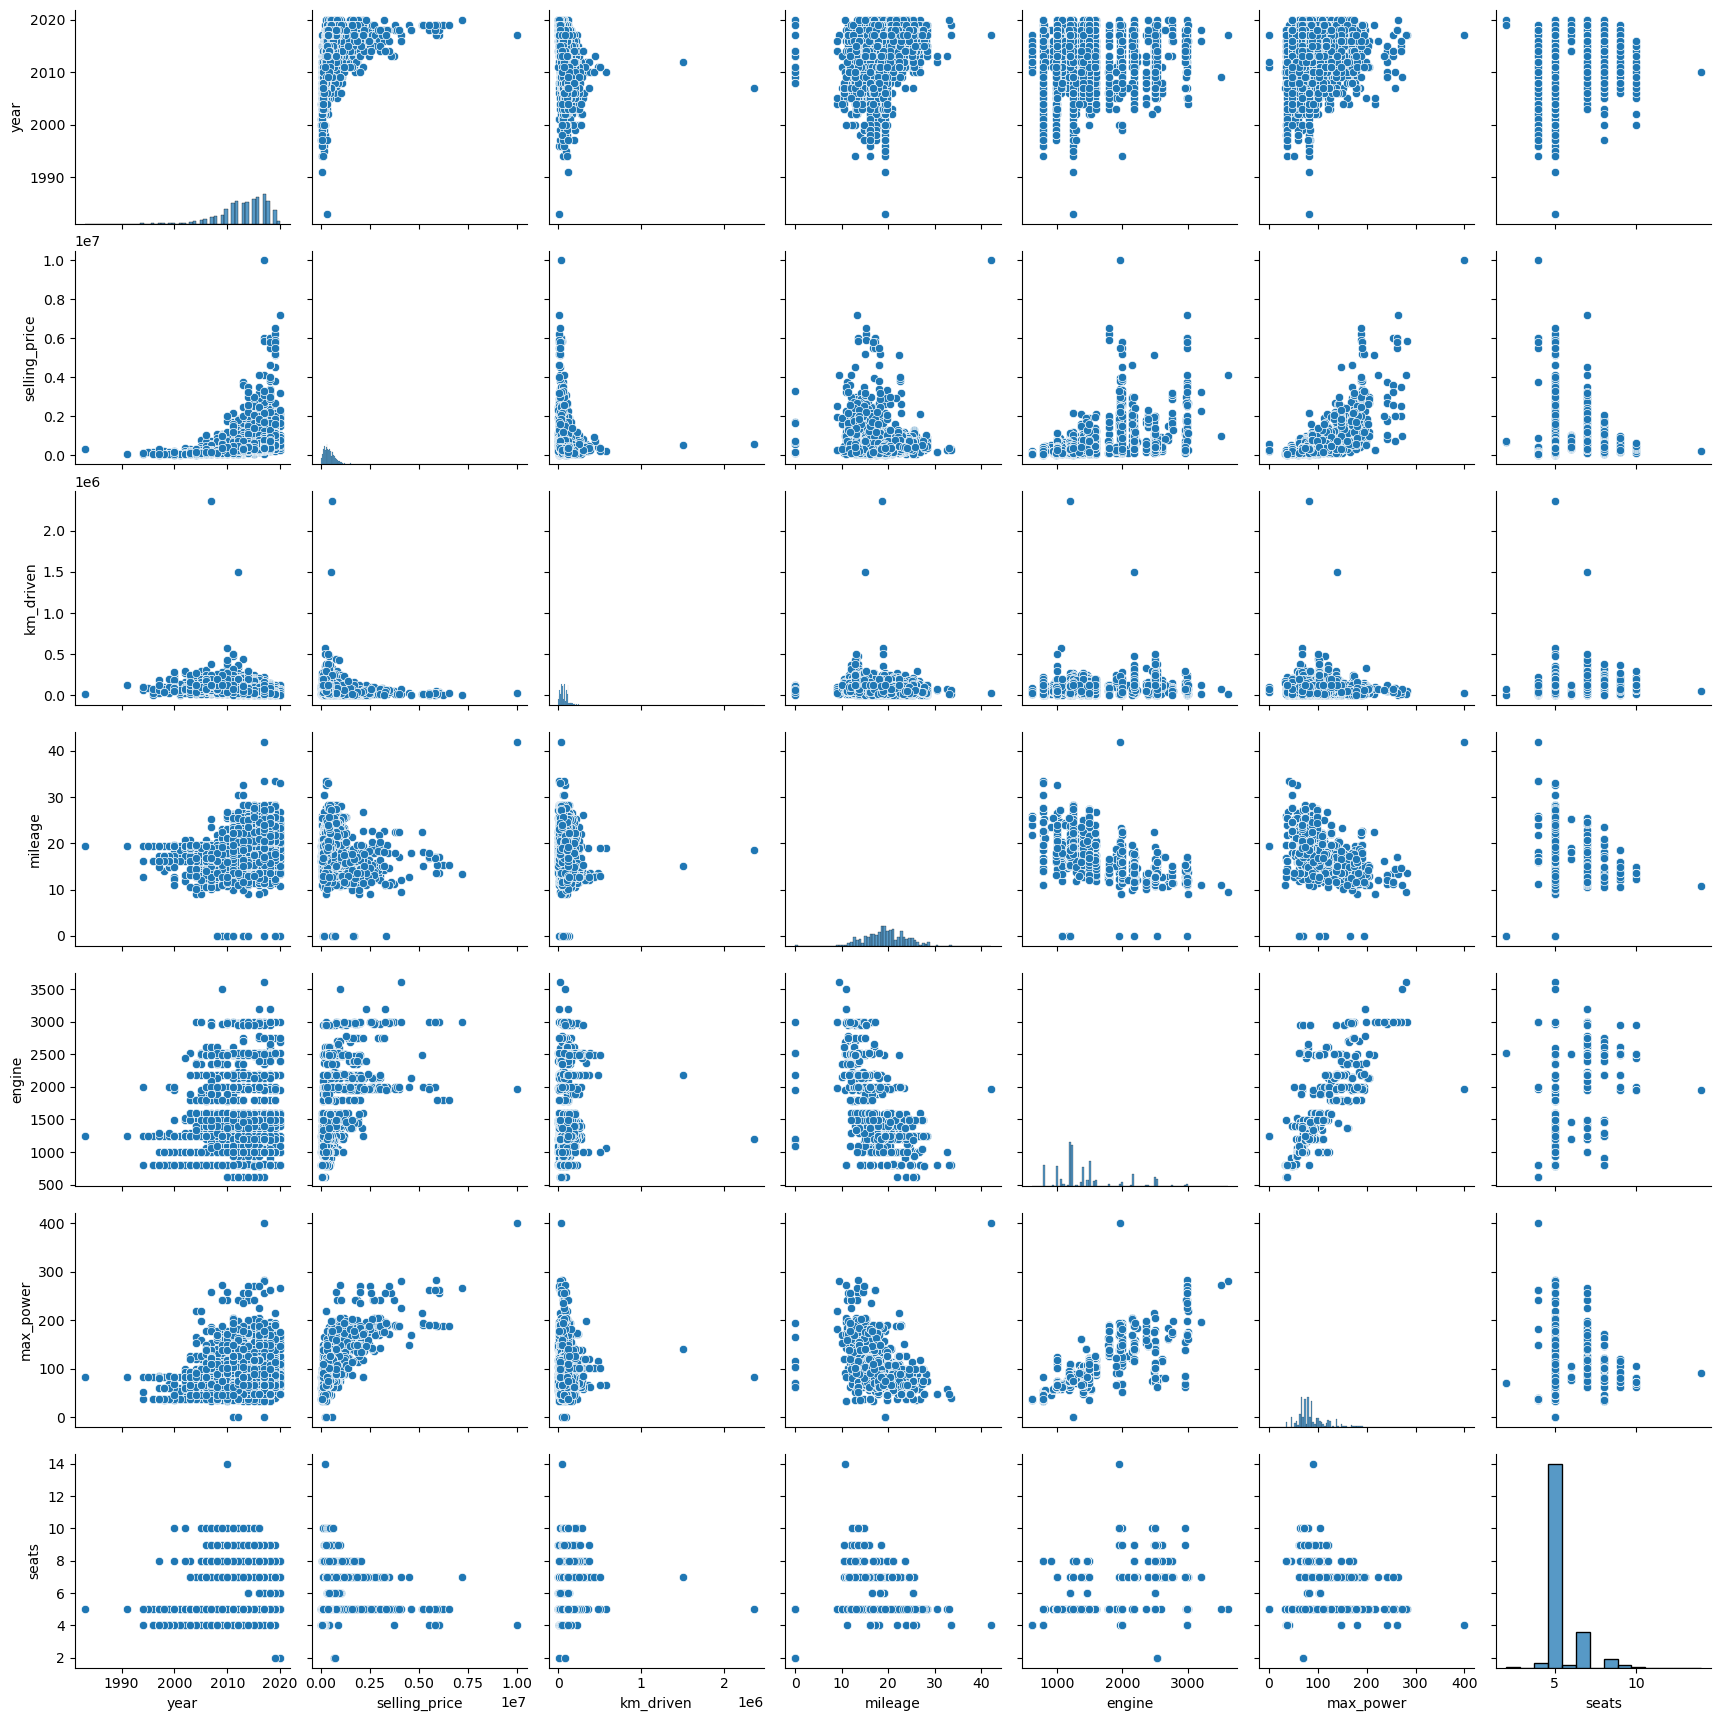

In [38]:
plt.figure(figsize=(6,6))
sns.pairplot(df_train)
plt.show()

Судя по распределению на test распределение похоже на train.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [39]:
features_num = df_train.select_dtypes(include=np.number)

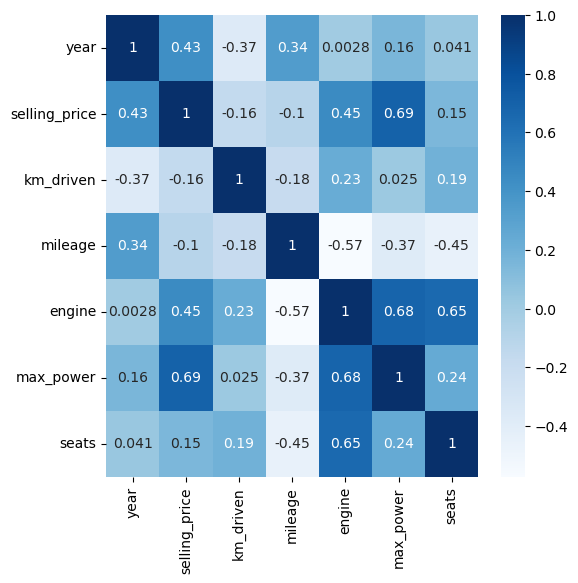

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(features_num.corr(),annot=True,cmap='Blues')

plt.show()

In [41]:
del features_num

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Engine, year наименее скоррелированы между собой
2. Наиболее высокая корреляция наблюдается между engine и max_power.
3. Чем старше машина, тем больше она проехала (между признаками отрицательная корреляция).

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

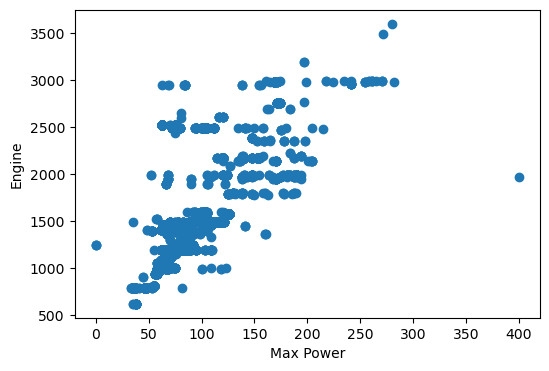

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x = df_train['max_power'], y = df_train['engine'])
plt.xlabel("Max Power")
plt.ylabel("Engine")

plt.show()

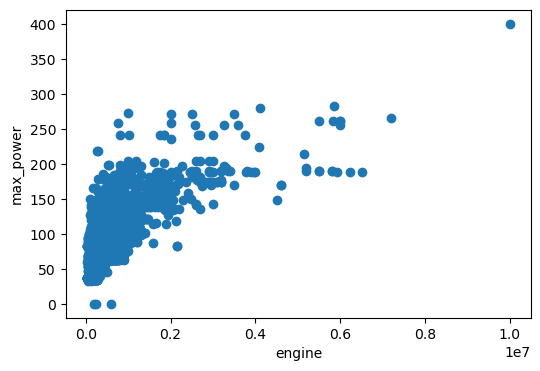

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x = df_train[target], y = df_train['max_power'])
plt.xlabel("engine")
plt.ylabel("max_power")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: xlabel='selling_price', ylabel='Density'>

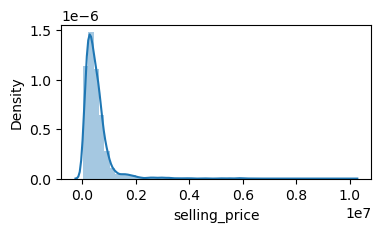

In [44]:
# распределение целевой
plt.figure(figsize=(4,2))
sns.distplot(df_train[target])

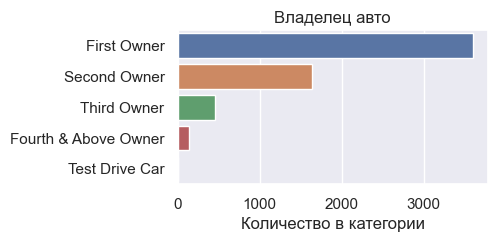

In [45]:
sns.set()

fig, ax = plt.subplots(figsize=(4,2))
ax = sns.countplot(y='owner', data=df_train)
ax.set_title('Владелец авто')
ax.set_ylabel('')

ax.set(xlabel='Количество в категории')


plt.show()

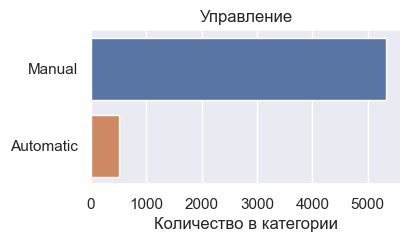

In [46]:
sns.set()

fig, ax = plt.subplots(figsize=(4,2))
ax = sns.countplot(y='transmission', data=df_train)
ax.set_title('Управление')
ax.set_ylabel('')

ax.set(xlabel='Количество в категории')


plt.show()

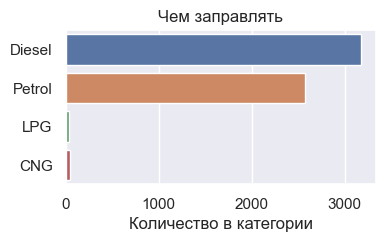

In [47]:
sns.set()

fig, ax = plt.subplots(figsize=(4,2))
ax = sns.countplot(y='fuel', data=df_train)
ax.set_title('Чем заправлять')
ax.set_ylabel('')

ax.set(xlabel='Количество в категории')


plt.show()

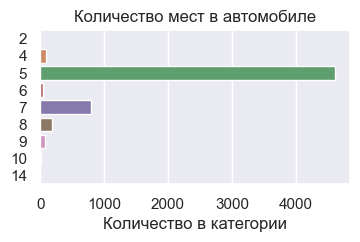

In [48]:
sns.set()

fig, ax = plt.subplots(figsize=(4,2))
ax = sns.countplot(y='seats', data=df_train)
ax.set_title('Количество мест в автомобиле')
ax.set_ylabel('')

ax.set(xlabel='Количество в категории')


plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [49]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [50]:
y_train = df_train[target].copy()
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].copy()

In [51]:
assert X_train.shape == (5840, 6)

In [52]:
y_test = df_test[target].copy()
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].copy()

In [53]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
preds_train = lr.predict(X_train)
preds = lr.predict(X_test)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.5923, test: 0.5941

MSE-score

Train: 116874153930.0292, test: 233298779730.4583


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', LinearRegression())
])

model = simple_pipeline.fit(X_train, y_train)
preds = model.predict(X_test)
preds_train = model.predict(X_train)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.5923, test: 0.5941

MSE-score

Train: 116874153930.0289, test: 233298779730.4496


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [56]:
df_weights = pd.DataFrame({'col' : model.feature_names_in_.tolist(), 'coef': model.named_steps.regression.coef_.tolist()})
df_weights['abs_coef'] = df_weights['coef'].abs()
df_weights.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
4,max_power,322807.353259,322807.353259
0,year,152772.570846,152772.570846
3,engine,61178.494337,61178.494337
1,km_driven,-44158.818520,44158.818520
2,mileage,28833.925778,28833.925778
5,seats,-23209.132486,23209.132486


max_power - самый информативный в предсказании цены

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [57]:
from sklearn.linear_model import Lasso

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Lasso())
])

model = simple_pipeline.fit(X_train, y_train)
preds = model.predict(X_test)
preds_train = model.predict(X_train)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.5923, test: 0.5941

MSE-score

Train: 116874153940.1429, test: 233299450599.1693


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [58]:
df_weights = pd.DataFrame({'col' : model.feature_names_in_.tolist(), 'coef': model.named_steps.regression.coef_.tolist()})
df_weights['abs_coef'] = df_weights['coef'].abs()
df_weights.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
4,max_power,322808.236919,322808.236919
0,year,152772.390214,152772.390214
3,engine,61173.662409,61173.662409
1,km_driven,-44157.689858,44157.689858
2,mileage,28832.043396,28832.043396
5,seats,-23206.255649,23206.255649


L1 регуляризатор по умолчанию (1) зануляет некоторые веса, если они имеют маленькие значения. В нашей модели веса имеют очень большие значения, поэтому их нельзя занулить с коэфициентом регуляризации 1.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [59]:
from sklearn.model_selection import GridSearchCV

alpha = np.logspace(0.01, 4, 100)

searcher = GridSearchCV(simple_pipeline, [{"regression__alpha": alpha}],
                        scoring="r2", cv=10, n_jobs=2)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 10000.0000


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10 фолдов и 100 разных гипов -> итого 1000 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [60]:
print("Best alpha = %.4f" % best_alpha)

lasso_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Lasso(best_alpha))
])

model = lasso_pipeline.fit(X_train, y_train)
preds = model.predict(X_test)
preds_train = model.predict(X_train)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

Best alpha = 10000.0000
R2-score

Train: 0.5893, test: 0.5816

MSE-score

Train: 117736595208.7836, test: 240511826990.2261


In [61]:
df_weights = pd.DataFrame({'col' : model.feature_names_in_.tolist(), 'coef': model.named_steps.regression.coef_.tolist()})
df_weights['abs_coef'] = df_weights['coef'].abs()
df_weights.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
4,max_power,329230.147572,329230.147572
0,year,151810.983864,151810.983864
1,km_driven,-32735.113566,32735.113566
3,engine,17841.622335,17841.622335
2,mileage,9285.997922,9285.997922
5,seats,-0.000000,0.000000


Лучший alpha=10000. Обнулился коэффициент при seats при использованни Lasso.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [62]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(0.01, 4, 10)
l1_ratio = np.logspace(0, 1, 10)

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', ElasticNet())
])

searcher = GridSearchCV(simple_pipeline, [{"regression__alpha": alpha,
                                           "regression__l1_ratio" : l1_ratio}],
                        scoring="r2", cv=10, n_jobs=2)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
best_l1_ratio = searcher.best_params_["regression__l1_ratio"]
print("Best alpha = %.4f" % best_alpha)
print("Best alpha = %.4f" % best_l1_ratio)

Best alpha = 10000.0000
Best alpha = 1.0000


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [63]:
print("Best alpha = %.4f" % best_alpha)
print("Best alpha = %.4f" % best_l1_ratio)

lasso_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', ElasticNet(alpha = best_alpha, l1_ratio = best_l1_ratio))
])

model = lasso_pipeline.fit(X_train, y_train)
preds = model.predict(X_test)
preds_train = model.predict(X_train)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

Best alpha = 10000.0000
Best alpha = 1.0000
R2-score

Train: 0.5893, test: 0.5816

MSE-score

Train: 117736595208.7836, test: 240511826990.2261


In [64]:
df_weights = pd.DataFrame({'col' : model.feature_names_in_.tolist(), 'coef': model.named_steps.regression.coef_.tolist()})
df_weights['abs_coef'] = df_weights['coef'].abs()
df_weights.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
4,max_power,329230.147572,329230.147572
0,year,151810.983864,151810.983864
1,km_driven,-32735.113566,32735.113566
3,engine,17841.622335,17841.622335
2,mileage,9285.997922,9285.997922
5,seats,-0.000000,0.000000


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [65]:
model_col = [col for col in df_train.columns if col not in [target, 'name']]
X_train_cat = df_train[model_col].copy()
X_test_cat = df_test[model_col].copy()

In [66]:
assert X_train_cat.shape == (5840, 10)

In [67]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [68]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

categorical = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
numeric_features = [col for col in X_train_cat.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [69]:
# Вылетает warning, связанный с тем, что у нас не все категории из train есть в valid выборке. Но выше сказано
# удалить 1 столбец для устранения мультиколлинеарности

from sklearn.linear_model import Ridge

alpha = np.logspace(0.01, 4, 100)

simple_pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

searcher = GridSearchCV(simple_pipeline, [{"regression__alpha": alpha}],
                        scoring="r2", cv=10, n_jobs=2)
searcher.fit(X_train_cat, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannik

/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannik

/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/liliyaivannik

Best alpha = 7.8825


/Users/liliyaivannikova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [70]:
print("Best alpha = %.4f" % best_alpha)

ridge_pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=best_alpha))
])

model = ridge_pipeline.fit(X_train_cat, y_train)
preds = model.predict(X_test_cat)
preds_train = model.predict(X_train_cat)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

Best alpha = 7.8825
R2-score

Train: 0.6557, test: 0.6449

MSE-score

Train: 98698695919.9372, test: 204149902618.4192


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Новые признаки (полиномиальные)

In [71]:
numeric_features

['year', 'km_driven', 'mileage', 'engine', 'max_power']

In [72]:
# Генерация новых факторов
from sklearn.preprocessing import PolynomialFeatures

transformer1 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_features),
        ('categorical_transformer', transformer2, categorical)
    ])


ridge_pipeline = Pipeline([
    ('preproc_regr', transformer),
    ('regression', Ridge(alpha=100))
])

model = ridge_pipeline.fit(X_train_cat, y_train)
preds = model.predict(X_test_cat)
preds_train = model.predict(X_train_cat)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.8191, test: 0.8312

MSE-score

Train: 51865002230.1518, test: 97022747965.0586


## Работа с категориальными

In [73]:
# Добыть новые признаки

df_train_old['auto_mark'] = df_train_old['name'].str.split(' ', expand=True)[0]
df_test_old['auto_mark'] = df_test_old['name'].str.split(' ', expand=True)[0]

In [74]:
df_train_cat = df_train_old.copy()
df_test_cat = df_test_old.copy()

<Figure size 600x600 with 0 Axes>

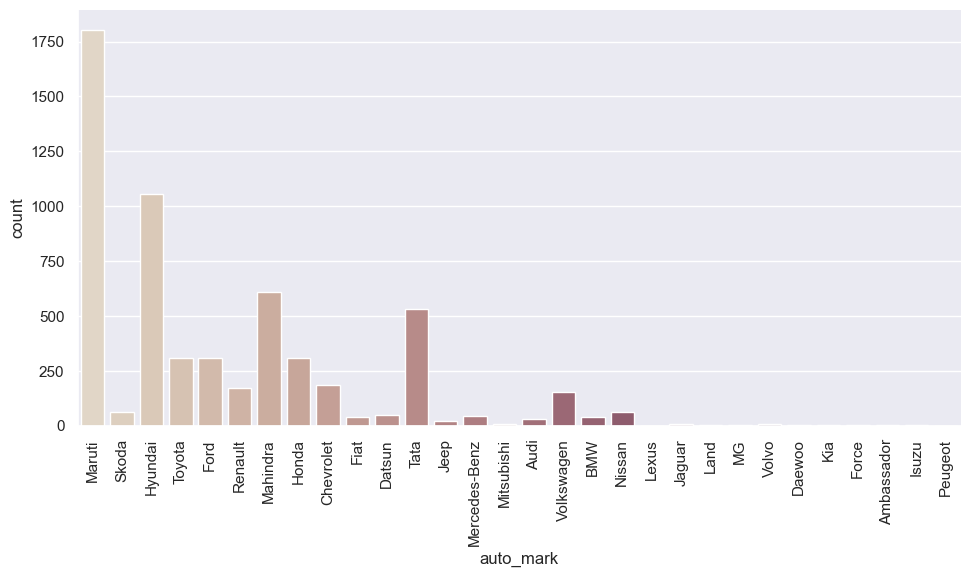

In [75]:
var = "auto_mark"
plt.figure(figsize=(6, 6))
sns.catplot(x=var, kind="count", palette="ch:.25", aspect=2, data=df_train_cat)
plt.xticks(rotation=90)
plt.show()

Очень большой разброс, поэтому есть идея достать информацию о стране производителе и попробовать добавить, как фичу

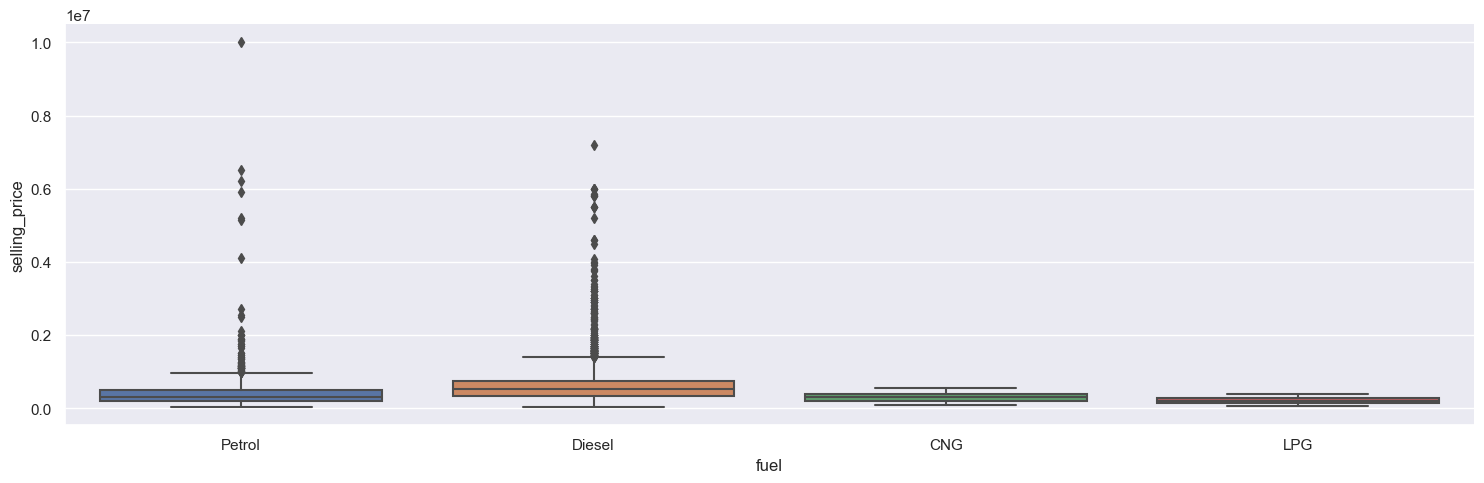

In [76]:
var = 'fuel'
sns.catplot(y=target, x=var, data= df_train_cat.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

В пункте про доп. визуализацию показано, что в CNG, LPG мало наблюдений, разброс цен там схожий. Объединила их в 1 категорию

In [77]:
def fuel_pr(var):
    if var == 'Petrol':
        new_var = 'Petrol'
    elif var == 'Diesel':
        new_var = 'Diesel'
    else:
        new_var = 'Other'
        
    return new_var

df_train_cat['fuel'] = df_train_cat['fuel'].apply(lambda x: fuel_pr(x))
df_test_cat['fuel'] = df_test_cat['fuel'].apply(lambda x: fuel_pr(x))

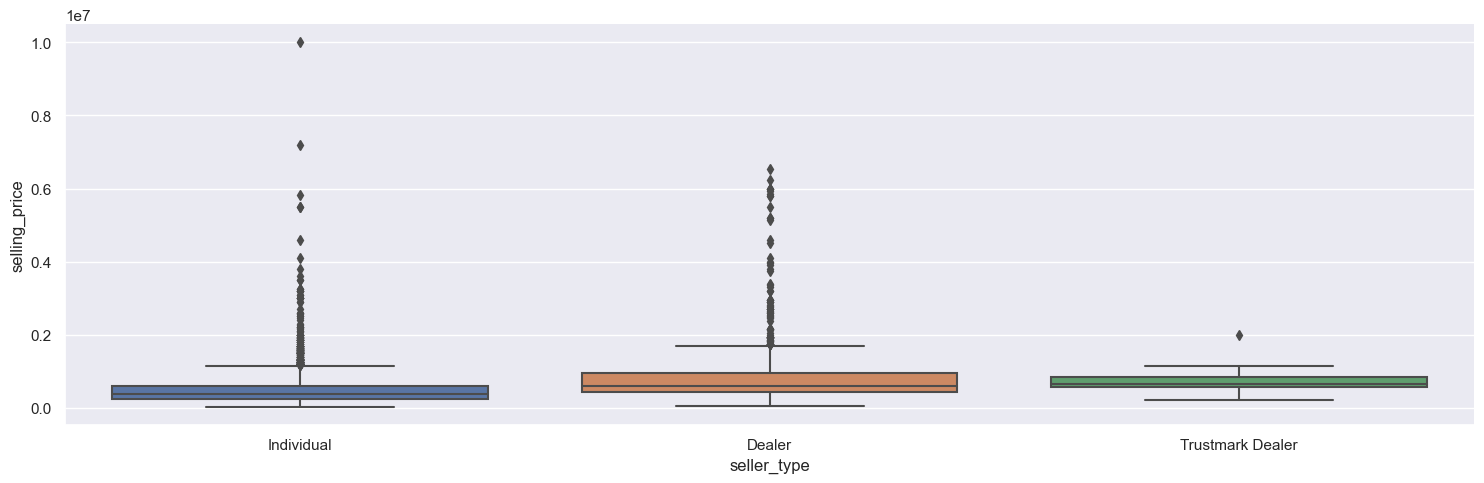

In [78]:
var = 'seller_type'
sns.catplot(y=target, x=var, data= df_train_cat.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

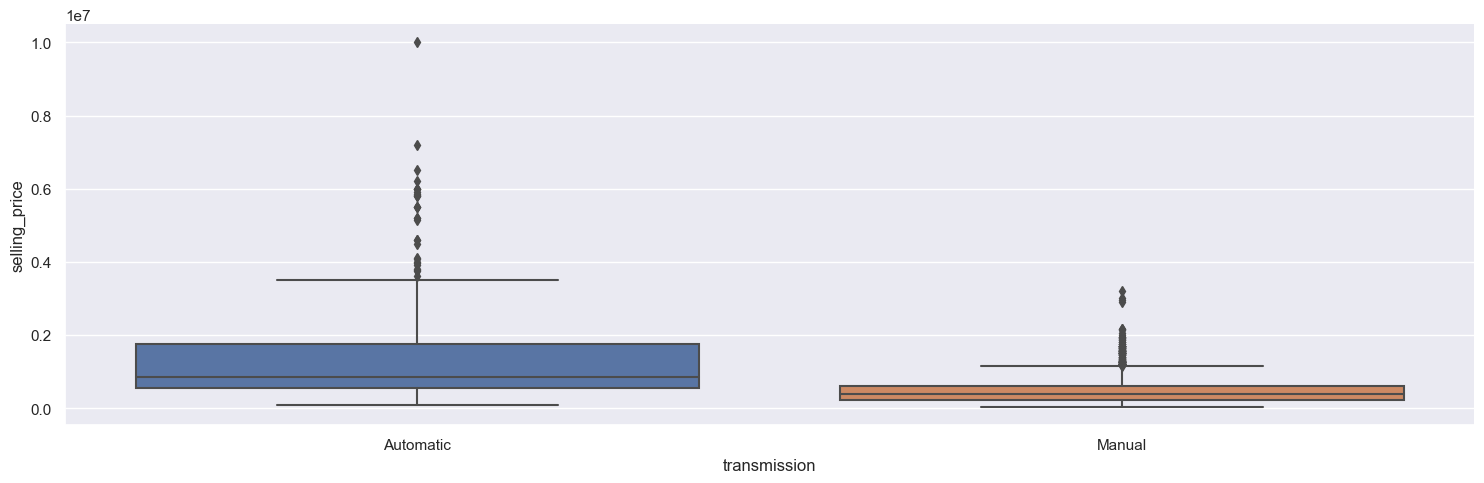

In [79]:
var = 'transmission'
sns.catplot(y=target, x=var, data= df_train_cat.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

In [80]:
def transmission_pr(var):
    if var == 'Automatic':
        new_var = 1
    else:
        new_var = 0
        
    return new_var

df_train_cat['transmission'] = df_train_cat['transmission'].apply(lambda x: transmission_pr(x))
df_test_cat['transmission'] = df_test_cat['transmission'].apply(lambda x: transmission_pr(x))

Фичу transmission просто заменили на 1/0.

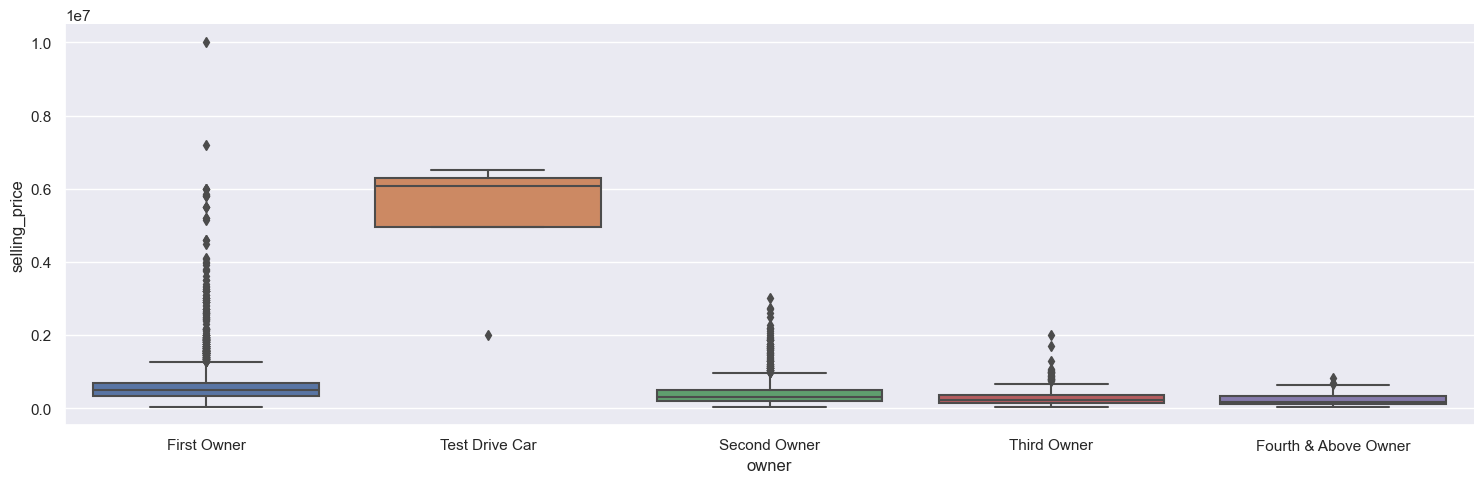

In [81]:
var = 'owner'
sns.catplot(y=target, x=var, data= df_train_cat.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

In [82]:
df_train_cat['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

В зависимости от owner разброс цены разный (чем меньше было владельцев, тем выше цена). Поэтому просто провела подобие labelencoding здесь

In [83]:
def owner_pr(var):
    if var == 'Test Drive Car':
        new_var = 5
    elif var == 'First Owner':
        new_var = 4
    elif var == 'Second Owner':
        new_var = 3
    elif var == 'Third Owner':
        new_var = 2
    else:
        new_var = 1
        
    return new_var

df_train_cat['owner'] = df_train_cat['owner'].apply(lambda x: owner_pr(x))
df_test_cat['owner'] = df_test_cat['owner'].apply(lambda x: owner_pr(x))

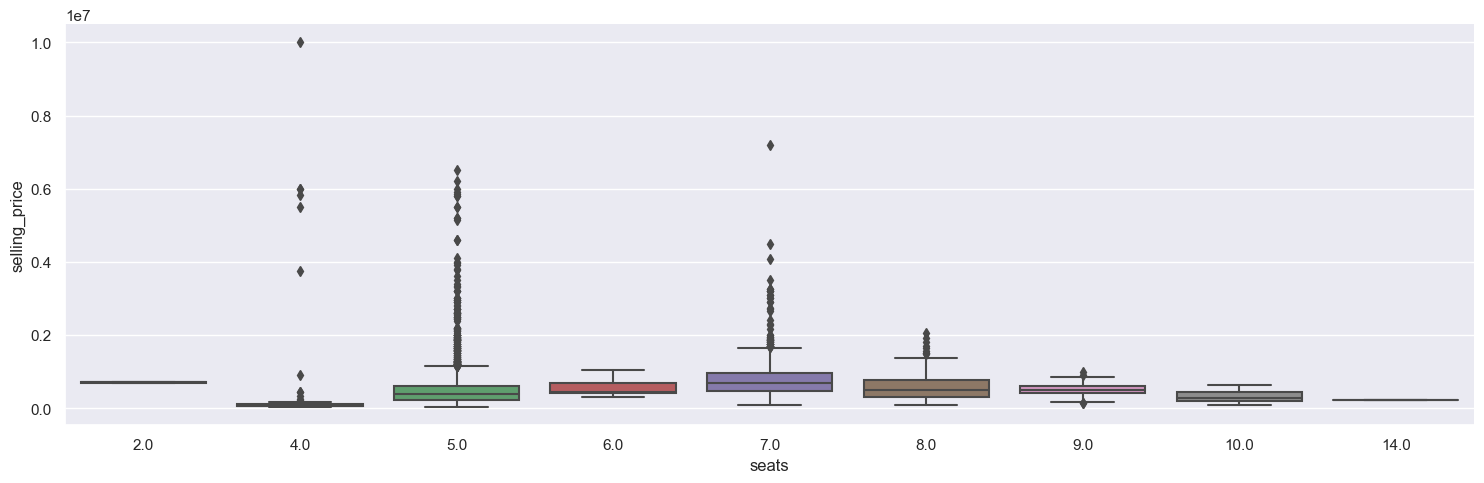

In [84]:
var = 'seats'
sns.catplot(y=target, x=var, data= df_train_cat.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

In [85]:
# Land Rover скорректировали
df_train_cat.loc[df_train_cat['auto_mark'] == 'Land', 'auto_mark'] = 'Land Rover'
df_test_cat.loc[df_test_cat['auto_mark'] == 'Land', 'auto_mark'] = 'Land Rover'

In [86]:
# информация о стране производители марки автомобиля
df_countries = pd.read_csv('country.csv', sep = ';')

In [87]:
df_countries.head(3)

,auto_mark,country
0,Maruti,Индия
1,Skoda,Франция
2,Hyundai,Южная Корея


In [88]:
df_train_country = df_train_cat.merge(df_countries, on=['auto_mark'], how='left')

In [89]:
df_test_country = df_test_cat.merge(df_countries, on=['auto_mark'], how='left')

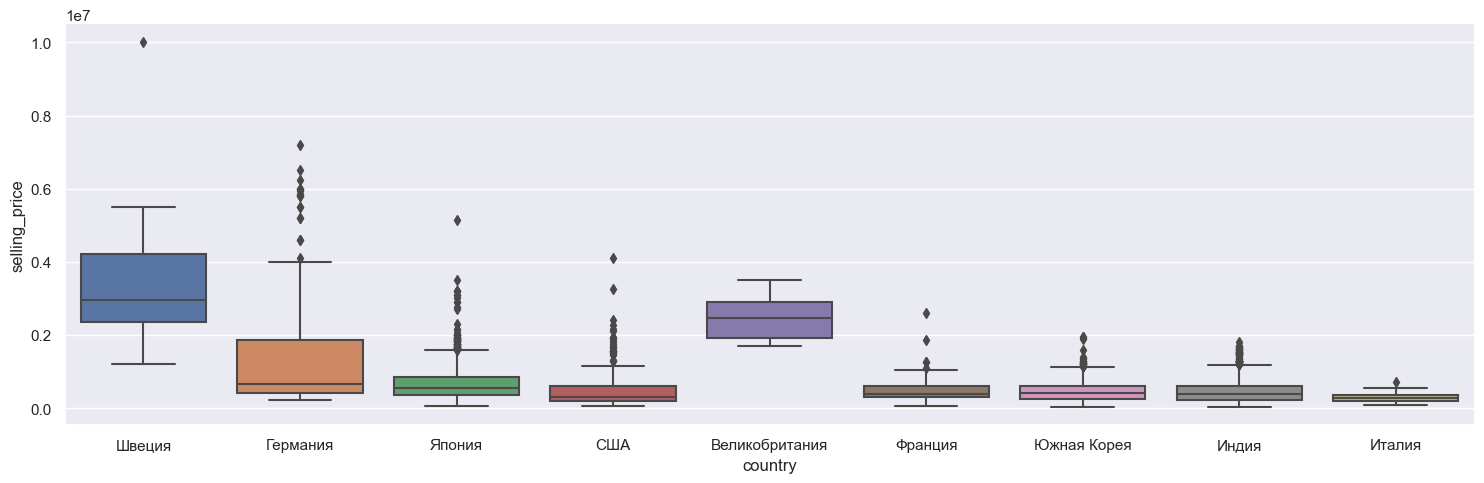

In [90]:
var = 'country'
sns.catplot(y=target, x=var, data= df_train_country.sort_values(target, ascending=False), kind="box", aspect=3)
plt.show()

In [91]:
df_train_country.drop(['name', 'auto_mark'], axis=1, inplace=True)
df_test_country.drop(['name', 'auto_mark'], axis=1, inplace=True)

In [92]:
df_train_country['seats'] = df_train_country['seats'].astype('category')
df_test_country['seats'] = df_test_country['seats'].astype('category')

In [93]:
df_train_country.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,country
0,2014,450000,145500,Diesel,Individual,0,4,23.40,1248.0,74.00,5.0,Индия
1,2014,370000,120000,Diesel,Individual,0,3,21.14,1498.0,103.52,5.0,Франция
2,2010,225000,127000,Diesel,Individual,0,4,23.00,1396.0,90.00,5.0,Южная Корея


In [97]:
category_col = ['fuel', 'seller_type', 'seats', 'country']
numeric_col = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

In [95]:
df_train_country['country'].fillna('None', inplace=True)
df_test_country['country'].fillna('None', inplace=True)

In [96]:
df_train_country.drop(target, axis=1, inplace=True)
df_test_country.drop(target, axis=1, inplace=True)

In [98]:
# Генерация новых факторов
from sklearn.preprocessing import PolynomialFeatures

transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


ridge_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=100))
])

model = ridge_pipeline.fit(df_train_country, y_train)
preds = model.predict(df_test_country)
preds_train = model.predict(df_train_country)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.8730, test: 0.8793

MSE-score

Train: 36407811754.3895, test: 69356841207.7318


## обработка пропусков - добавление флага пропусков

In [99]:
df_train_task5 = df_train_country.copy()
df_test_task5 = df_test_country.copy()

In [100]:
def imputation_pr(df, imput_cols:list):
    
    # imput_cols - поля, которые надо обработать на пропуски
    
    for col in imput_cols:
        df[col + '_Nan'] = np.where(df[col].isnull(), 1, 0)
        
    return df

In [101]:
df_train_task5 = imputation_pr(df_train_task5, df_train_country.columns)
df_test_task5 = imputation_pr(df_test_task5, df_test_country.columns)

In [102]:
# Генерация новых факторов
from sklearn.preprocessing import PolynomialFeatures

transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


ridge_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=100))
])


model = ridge_pipeline.fit(df_train_task5, y_train)
preds = model.predict(df_test_task5)
preds_train = model.predict(df_train_task5)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.8730, test: 0.8793

MSE-score

Train: 36407811754.3895, test: 69356841207.7318


Качество не улучшается

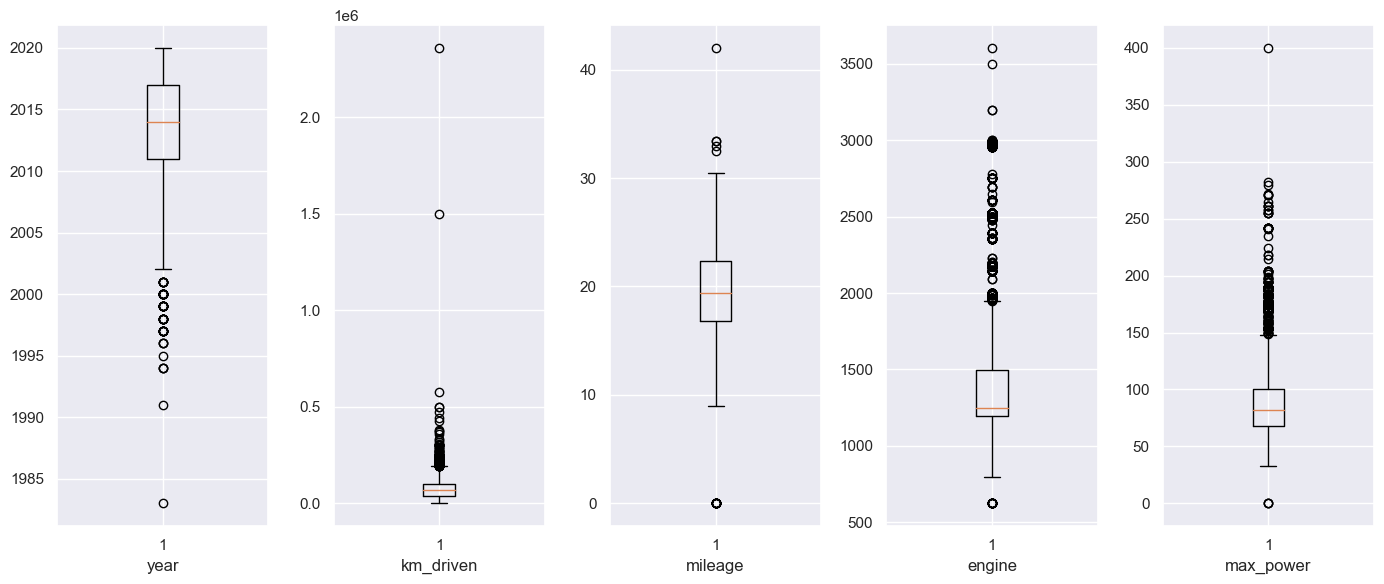

In [103]:
fig, axes = plt.subplots(nrows= 1, ncols=len(numeric_col),
                       figsize=(14,6) )

axes = axes.ravel() 

for col, ax in zip(numeric_col, axes):

    ax.boxplot(x=df_train_task5[col].dropna())
    
    ax.set_xlabel(col, fontsize=12)

fig.tight_layout()
plt.show()

### замена перцентилем

In [104]:
# попробуем заменить выбросы

df_train_task5_rmv = df_train_country.copy()
df_test_task5_rmv = df_test_country.copy()

for cols in ['year']:
    perc_1 = int(df_train_task5_rmv[cols].quantile(0.01))
    df_train_task5_rmv.loc[df_train_task5_rmv[cols]  < perc_1,cols] = perc_1
    df_test_task5_rmv.loc[df_test_task5_rmv[cols]  < perc_1,cols] = perc_1
    
for cols in ['km_driven', 'engine', 'max_power']:
    perc_95 = int(df_train_task5_rmv[cols].quantile(0.95))
    df_train_task5_rmv.loc[df_train_task5_rmv[cols] > perc_95,cols] = perc_95
    df_test_task5_rmv.loc[df_test_task5_rmv[cols] > perc_95,cols] = perc_95

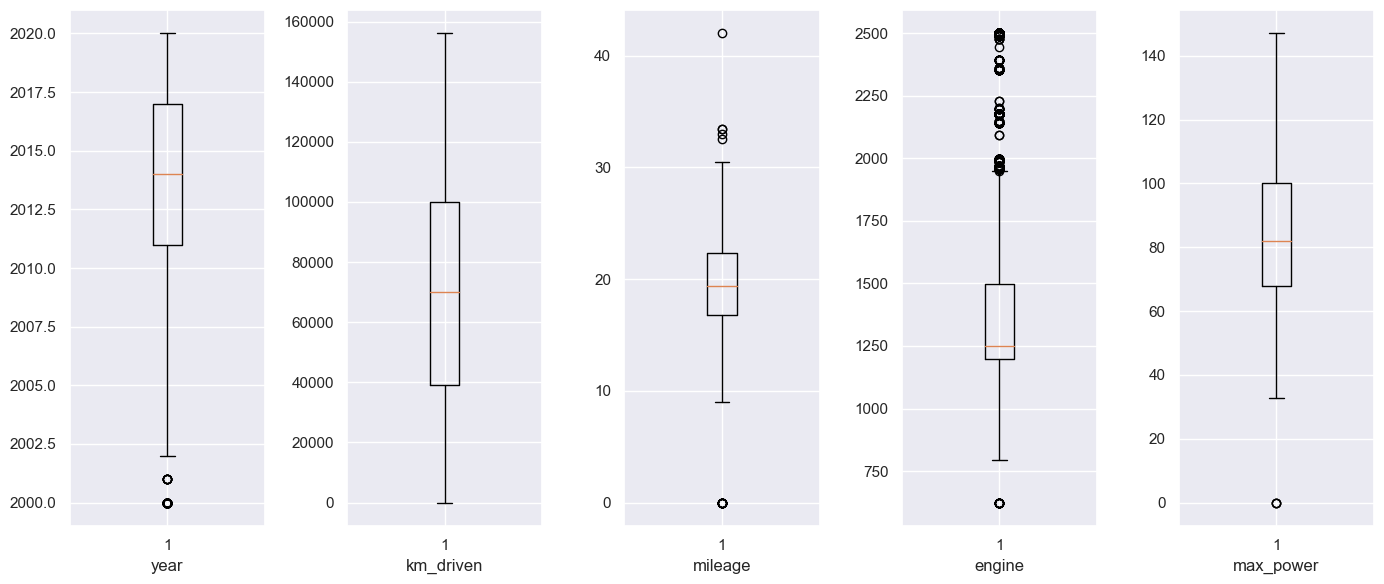

In [105]:
fig, axes = plt.subplots(nrows= 1, ncols=len(numeric_col),
                       figsize=(14,6) )

axes = axes.ravel() 

for col, ax in zip(numeric_col, axes):

    ax.boxplot(x=df_train_task5_rmv[col].dropna())
    
    ax.set_xlabel(col, fontsize=12)

fig.tight_layout()
plt.show()

In [106]:

transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


ridge_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=100))
])


model = ridge_pipeline.fit(df_train_task5_rmv, y_train)
preds = model.predict(df_test_task5_rmv)
preds_train = model.predict(df_train_task5_rmv)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, preds_train), r2_score(y_test, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, preds_train), MSE(y_test, preds)))

R2-score

Train: 0.8307, test: 0.8232

MSE-score

Train: 48530932001.0263, test: 101651883086.1661


## Логарифмируем целевую

In [107]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [108]:
transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='first'))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


ridge_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=100))
])


model = ridge_pipeline.fit(df_train_country, y_train_log)
preds = model.predict(df_test_country)
preds_train = model.predict(df_train_country)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train_log, preds_train), r2_score(y_test_log, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train_log, preds_train), MSE(y_test_log, preds)))

R2-score

Train: 0.8837, test: 0.9034

MSE-score

Train: 0.0680, test: 0.0691


In [109]:
df_train_country['PRED'] = np.e ** preds_train
df_test_country['PRED'] = np.e ** preds


In [110]:
print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, df_train_country['PRED'] ), r2_score(y_test, df_test_country['PRED'])))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, df_train_country['PRED'] ), MSE(y_test, df_test_country['PRED'])))

R2-score

Train: 0.8824, test: 0.9039

MSE-score

Train: 33716710871.8377, test: 55267806248.7338


## финальная модель - gridsearch

In [111]:
df_train_country.drop('PRED', axis=1, inplace=True)
df_test_country.drop('PRED', axis=1, inplace=True)

In [114]:
transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore"))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


fin_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=100))
])


alpha = np.logspace(0.01, 4, 100)

searcher = GridSearchCV(fin_pipeline, [{"regression__alpha": alpha}],
                        scoring="r2", cv=5, n_jobs=2)

searcher.fit(df_train_country, y_train_log)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 11.4256


In [117]:
transformer1 = Pipeline(steps=[
    ('imputs', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())

])

transformer2 = Pipeline(steps=[

    ('ohe', OneHotEncoder(handle_unknown="ignore"))])

transformer = ColumnTransformer(
    transformers=[
        ('numeric_transformer', transformer1, numeric_col),
        ('categorical_transformer', transformer2, category_col)
    ])


fin_pipeline = Pipeline([

    ('preproc_regr', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=best_alpha))
])


model = fin_pipeline.fit(df_train_country, y_train_log)
preds = model.predict(df_test_country)
preds_train = model.predict(df_train_country)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train_log, preds_train), r2_score(y_test_log, preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train_log, preds_train), MSE(y_test_log, preds)))

R2-score

Train: 0.8912, test: 0.9075

MSE-score

Train: 0.0636, test: 0.0661


In [118]:
print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, np.e ** preds_train ), r2_score(y_test, np.e ** preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, np.e ** preds_train ), MSE(y_test, np.e ** preds)))

R2-score

Train: 0.9023, test: 0.9183

MSE-score

Train: 27992942219.8736, test: 46955640032.1502


Финальная модель
Ridge - модель с полиномиальными признаками, ohe и добавлением старны производителя автомобиля

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [119]:
def business_metrics(y_true, y_pred):
    return y_pred[abs(y_true - y_pred) / y_true <= 0.1].shape[0] / y_true.shape[0]

business_metrics(y_test, np.e ** preds)

0.324

In [120]:
# сохранение
import pickle

pickle.dump(model, open('car_price_predictor.pkl', 'wb'))

In [121]:
predictor = pickle.load(open('car_price_predictor.pkl', 'rb'))

In [122]:
# проверка, что все работает
preds = predictor.predict(df_test_country)
preds_train = predictor.predict(df_train_country)

print('R2-score\n')
print('Train: %.4f, test: %.4f\n' %(r2_score(y_train, np.e ** preds_train ), r2_score(y_test, np.e ** preds)))
print('MSE-score\n')
print('Train: %.4f, test: %.4f' %(MSE(y_train, np.e ** preds_train ), MSE(y_test, np.e ** preds)))

R2-score

Train: 0.9023, test: 0.9183

MSE-score

Train: 27992942219.8736, test: 46955640032.1502


In [123]:
df_test.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7


In [520]:
df_test.iloc[0:4].to_csv('test_ml.csv')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link